# <font color = "blue"> Data Science Machine Learning</font>
# <font color = "blue"> Regressão Linear Simples</font>

### Carregando o data set Boston Houses

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-residential acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

### Carregando as colunas do data set Boston Houses em Português 

1. CRIM: Taxa de crime per capita por cidade 
2. ZN: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.
3. INDUS: proporção de acres não residenciais por cidade 
4. CHAS: ariável dummy de Charles River (= 1 se a área limita o rio; 0 caso contrário) 
5. NOX: concentração de óxidos nítricos (partes por 10 milhões) 
6. RM: número médio de quartos por habitação 
7. AGE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940
8. DIS: distâncias ponderadas para cinco centros de empregos de Boston 
9. RAD: índice de acessibilidade a rodovias radiais 
10. TAX: taxa de imposto sobre a propriedade de valor total por 10.000 
11. PTRATIO: proporção aluno-professor por cidade 
12. B: 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade 
13. LSTAT: % status inferior da população 
14. TARGET: Valor médio das casas ocupadas pelo proprietário em US $ 1.000

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando o data set Boston Houses
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
# Carregando as chaves do data set
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
# Carregando a chave data
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
# Convertendo o data set em um dataframe com pandas

dataset = pd.DataFrame(boston['data'],columns = boston['feature_names'])
dataset['target'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# tirando a média da ultima coluna o target
media = dataset['target'].mean()
media

22.532806324110698

In [5]:
# calculando o SSE
squared_errorors = pd.Series(media - boston.target)**2
SSE = np.sum(squared_errorors)
print('Soma dos quadrados dos erros {:.2f}'.format(SSE))

Soma dos quadrados dos erros 42716.30


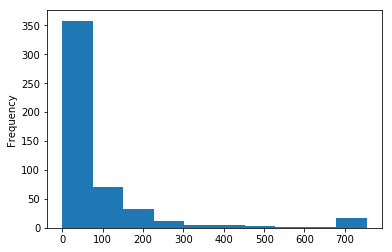

In [16]:
hist_plot = squared_errorors.plot('hist')

In [6]:
# Imprimindo o desvio padrão com numpy
desvio_padrao = np.std(dataset['RM'])
print('Resultado desvio padrão numpy {:.5f}'.format(desvio_padrao))

Resultado desvio padrão numpy 0.70192


In [7]:
np.sum(squared_errorors)

42716.29541501976

In [12]:
# Função pearsonr
from scipy.stats.stats import pearsonr
print('Correlação apartir da função pearsonr do Scipy: %0.5f' % pearsonr(dataset['RM'],dataset['target'])[0])

Correlação apartir da função pearsonr do Scipy: 0.69536


In [13]:
# Definindo o range dos valores de x e y
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

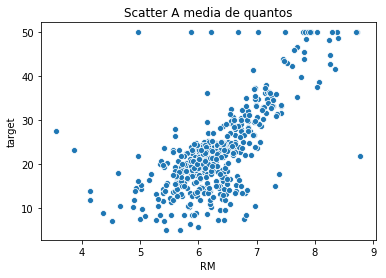

In [29]:
sns.scatterplot(data = dataset, x = 'RM',y = 'target',palette = 'deep')

In [16]:
from sklearn import linear_model

In [17]:
# Criando o objeto
modelo = linear_model.LinearRegression(normalize = False,fit_intercept = True)

In [22]:
# Definindo os valores de x ey
num_observ = len(dataset)
X = dataset['RM'].values.reshape((num_observ,1)) # X sempre tem dde ser uma matriz e nunca um vetor
Y = dataset['target'].values # Y pode ser vetor

In [23]:
# Aplicando o modelo - fit()
modelo.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# Imprimindo os coeficientes
print(modelo.coef_)
print(modelo.intercept_)

[9.10210898]
-34.670620776438554


In [25]:
# imprimindo as previções
print(modelo.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


### No projeto usamos as seguintes bibliotecas

<li>Numpy
<li>Pandas
<li>Matplotlib
<li>Seaborn
<li>Sklearn
<li>Scipy    